# Library

In [ ]:
#Import library yang dibutuhkan 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

# Data yang DIgunakan

Untuk Dataset yang digunakan sudah disediakan dalam format csv,

Untuk detil datanya adalah sebagai berikut:

    * UpdatedAt : Periode of Data taken
    * customerID : Customer ID
    * gender : Whether the customer is a male or a female (Male, Female)
    * SeniorCitizen : Whether the customer is a senior citizen or not (Yes, No)
    * Partner : Whether the customer has a partner or not (Yes, No)
    * tenure : Number of months the customer has stayed with the company
    * PhoneService : Whether the customer has a phone service or not (Yes, No)
    * InternetService : Customer’s internet service provider (Yes, No)
    * StreamingTV : Whether the customer has streaming TV or not (Yes, No)
    * PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
    * MonthlyCharges : The amount charged to the customer monthly
    * TotalCharges : The total amount charged to the customer
    * Churn : Whether the customer churned or not (Yes, No)



In [ ]:
import pandas as pd

#import dataset
df_load = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco_final.csv')

#Tampilkan bentuk dari dataset
print(df_load.shape)

#Tampilkan jumlah ID yang unik
print(df_load.customerID.nunique())

#Tampilkan 5 data teratas
df_load.head()

(6950, 13)
6950


,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


# Exploratory Data Analysis

Exploratory Data Analysis memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya. Pada umumnya EDA dilakukan dengan beberapa cara:

    1. Univariat Analysis — analisis deskriptif dengan satu variabel.
    2. Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel.
    3. Multivariat Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel.

Dalam kasus ini, kamu diminta untuk melihat persebaran dari:

    1. Prosentase persebaran data Churn dan tidaknya dari seluruh data
    2. Persebarang data dari variable predictor terhadap label (Churn)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## Memvisualisasikan Prosentase Churn

Kita ingin melihat visualisasi data secara univariat terkait prosentase data churn dari pelanggan. Gunakan fungsi `value_counts()` untuk menghitung banyaknya unik dari sebuah kolom, `pie()` untuk membuat pie chart

In [ ]:
df_load['Churn'].value_counts()

No     5114
Yes    1836
Name: Churn, dtype: int64

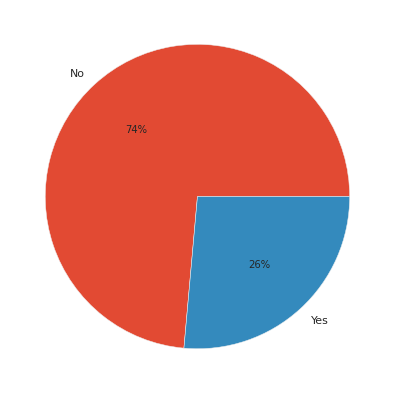

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
#Your codes here
plt.figure(figsize=(12,7))
labels =['No','Yes']
churn = df_load['Churn'].value_counts()
plt.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

dapat kita ketahui bahwa sebaran data secara kesuluruhan customer tidak melakukan churn, dengan detil Churn sebanyak 26% dan No Churn sebanyak 74%.

## Variabel Numerik

Hal yang akan kita lakukan selanjutnya adalah memilih variable predictor yang bersifat numerik dan membuat plot secara bivariat, kemudian menginterpretasikannya

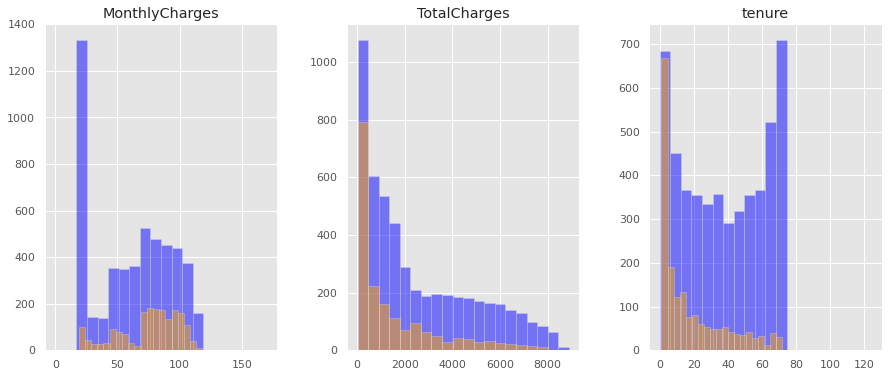

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load['Churn'] == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax) #alpha -> Transparansi plot, ax ->subplot
df_load[df_load['Churn'] == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

ATAU

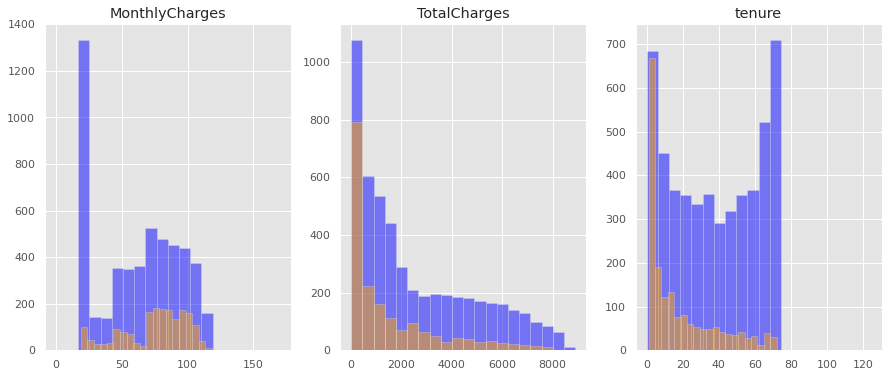

In [ ]:
# CARA LAIN
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(15,6))

# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
plt.subplot(1, 3, 1)
df_load[df_load['Churn'] == 'No']['MonthlyCharges'].hist(bins=20, color='blue', alpha=0.5) #alpha -> transparansi plot
df_load[df_load['Churn'] == 'Yes']['MonthlyCharges'].hist(bins=20, color='orange', alpha=0.5)
plt.title('MonthlyCharges')

plt.subplot(1, 3, 2)
df_load[df_load['Churn'] == 'No']['TotalCharges'].hist(bins=20, color='blue', alpha=0.5)
df_load[df_load['Churn'] == 'Yes']['TotalCharges'].hist(bins=20, color='orange', alpha=0.5)
plt.title('TotalCharges')

plt.subplot(1, 3, 3)
df_load[df_load['Churn'] == 'No']['tenure'].hist(bins=20, color='blue', alpha=0.5)
df_load[df_load['Churn'] == 'Yes']['tenure'].hist(bins=20, color='orange', alpha=0.5)
plt.title('tenure')

plt.show()

Dapat kita ketahui bahwa untuk `MonthlyCharges` ada kecenderungan `semakin kecil nilai biaya bulanan` yang dikenakan, `semakin kecil` juga kecenderungan untuk `melakukan Churn`. Untuk `TotalCharges` terlihat `tidak ada kecenderungan apapun` terhadap Churn customers. Untuk `tenure` ada kecenderungan `semakin lama` berlangganan customer, `semakin kecil` kecenderungan untuk melakukan `Churn`

## Variabel Kategorik

kita akan melakukan pemilihan variable predictor yang bersifat kategorik dan membuat plot secara bivariat, kemudian menginterpretasikannya

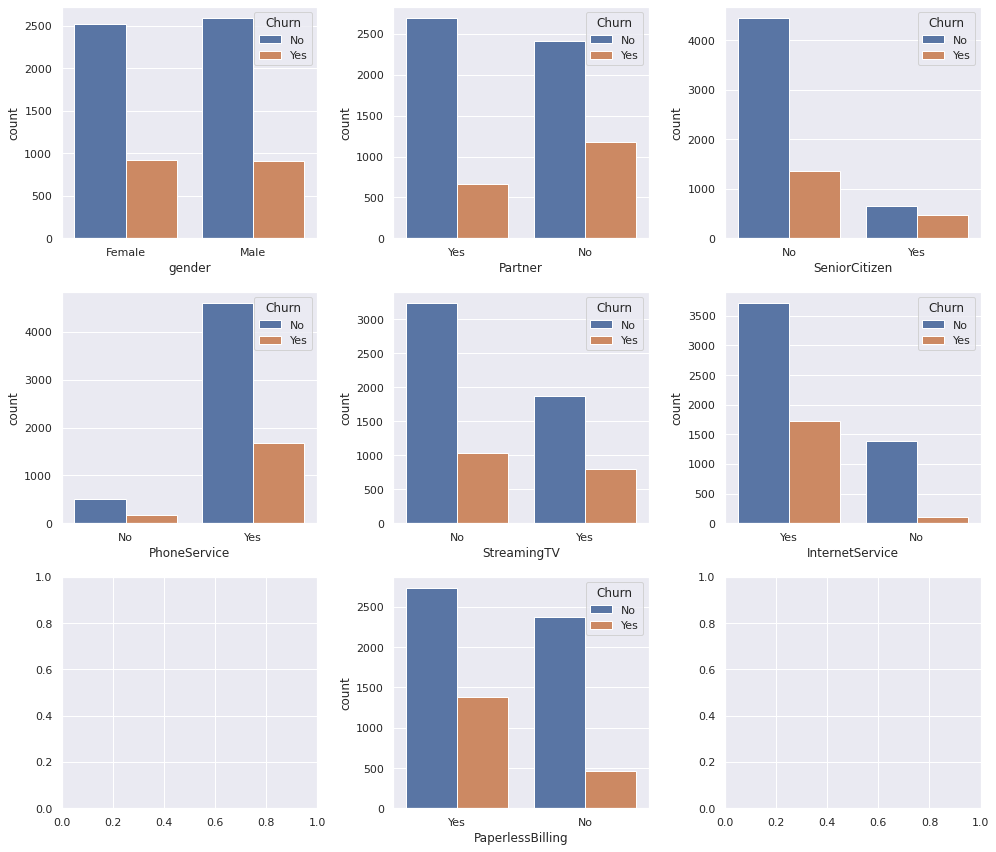

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0]) # ax -> posisi subplot, hue- > legend / categorical variable
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
#sns.countplot(df_load['PaperlessBilling'], order = df_load['PaperlessBilling'].value_counts().index, ax = ax[2][0])
plt.tight_layout()
plt.show()

Dapat kita ketahui bahwa `tidak ada perbedaan yang signifikan untuk orang melakukan churn dilihat dari` faktor jenis kelamin (gender) dan layanan telfonnya (PhoneService). Akan tetapi ada `kecenderungan bahwa orang yang melakukan churn adalah` orang-orang yang tidak memiliki partner (partner: No), orang-orang yang statusnya adalah senior citizen(SeniorCitizen: Yes), orang-orang yang mempunyai layanan streaming TV (StreamingTV: Yes), orang-orang yang mempunyai layanan Internet (internetService: Yes) dan orang-orang yang tagihannya paperless (PaperlessBilling: Yes).

# Data PreProcessing

## Menghapus Unnecessary Columns dari data

In [ ]:
#Remove the unnecessary columns customerID & UpdatedAt
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1) #axis = 1 -> column based
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


## Encoding Data : Label Encoder
Gunakan data dari hasil dan analisa sebelumnya cleaned_df, untuk merubah value dari data yang masih berbentuk string untuk diubah ke dalam bentuk numeric menggunakan LabelEncoder()

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
  if cleaned_df[column].dtype == float or cleaned_df[column].dtype == int:
    continue
  # Perform encoding for each non-numeric column
  cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,0,0,1,1,29.85,29.85,0
1,1,0,1,60,1,0,0,1,20.50,1198.80,0
2,1,0,0,5,1,1,1,0,104.10,541.90,1
3,0,0,1,72,1,1,1,1,115.50,8312.75,0
4,0,0,1,56,1,1,1,0,81.25,4620.40,0


## Splitting Dataset
Gunakan data dari hasil dan analisa sebelumnya cleaned_df, untuk dibagi datasetnya menjadi 2 bagian (70% training & 30% testing) berdasarkan variable predictor (X) dan targetnya (Y). Gunakan train_test_split() untuk membagi data tersebut. Sertakan value_counts untuk mengecek apakah pembagian sudah sama proporsinya. Simpan hasil spliting data menjadi x_train, y_train, x_test & y_test

In [ ]:
from sklearn.model_selection import train_test_split
# Predictor dan target
X = np.array(cleaned_df.drop('Churn', axis = 1))
y = np.array(cleaned_df['Churn'])
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
#print('Persentase Churn di data Training adalah:')
#print(y_train.value_counts(normalize=True))

print('\nJumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
#print('Persentase Churn di data Testing adalah:')
#print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)

Jumlah baris dan kolom dari x_test adalah: (2085, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)


# Create Model

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='liblinear').fit(x_train, y_train)
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)
#solver='liblinear'

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


### Train Set Classification Report

In [ ]:
from sklearn.metrics import classification_report
# Predict
y_pred = log_model.predict(x_train)
# Print classification report
print('Classification Report Test Model (Logistic Regression) :')
print(classification_report(y_train, y_pred, labels=[0, 1]))

Classification Report Test Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.80      0.79      4865



### Train Set Confusion Matrix

          No Churn  Churn
No Churn      3225    350
Churn          647    643

TP: 3225 FN: 350
FP:  647 TN: 643


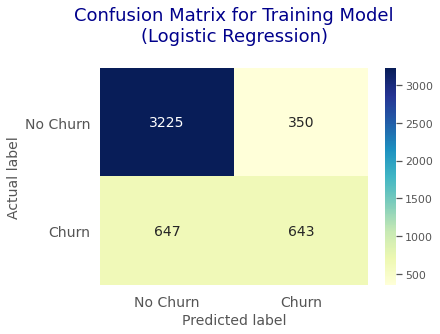

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
cnf_matrix = confusion_matrix(y_train, y_pred, labels=[0, 1])
confusion_matrix_df = pd.DataFrame(cnf_matrix, index=['No Churn', 'Churn'], columns=['No Churn', 'Churn'])
print(confusion_matrix_df)
print('\nTP: {} FN: {:>3}\nFP: {:>4} TN: {}'.format(cnf_matrix[0][0], cnf_matrix[0][1], cnf_matrix[1][0], cnf_matrix[1][1]))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('Actual label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 80%, dengan detil tebakan `churn` yang sebenernya `benar churn` adalah 643, tebakan `tidak churn` yang sebenernya `tidak churn` adalah 3225, tebakan `tidak churn` yang sebenernya `benar churn` adalah 647 dan tebakan `churn` yang sebenernya `tidak churn` adalah 350.

### Test Set Classification Report

In [ ]:
from sklearn.metrics import classification_report
# Predict
y_pred = log_model.predict(x_test)
# Print classification report
print('Classification Report Test Model (Logistic Regression) :')
print(classification_report(y_test, y_pred, labels=[0, 1]))

Classification Report Test Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.49      0.56       546

    accuracy                           0.80      2085
   macro avg       0.74      0.70      0.71      2085
weighted avg       0.78      0.80      0.79      2085



### Test Set Confusion Matrix

          No Churn  Churn
No Churn      1389    150
Churn          277    269

TP: 1389 FN: 150
FP:  277 TN: 269


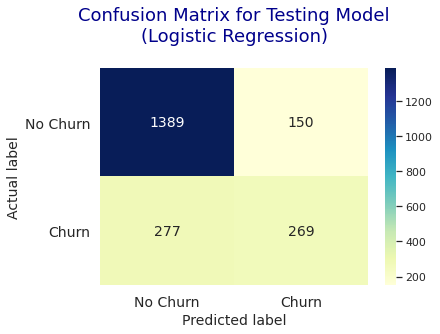

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
confusion_matrix_df = pd.DataFrame(cnf_matrix, index=['No Churn', 'Churn'], columns=['No Churn', 'Churn'])
print(confusion_matrix_df)
print('\nTP: {} FN: {:>3}\nFP: {:>4} TN: {}'.format(cnf_matrix[0][0], cnf_matrix[0][1], cnf_matrix[1][0], cnf_matrix[1][1]))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('Actual label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan `churn` yang sebenernya `benar churn` adalah 269, tebakan `tidak churn` yang sebenernya `tidak churn` adalah 1389, tebakan `tidak churn` yang sebenernya `benar churn` adalah 277 dan tebakan `churn` yang sebenernya `tidak churn` adalah 150.

In [ ]:
yhat_prob = log_model.predict_proba(x_test)
#check Class yg diprediksi
print(log_model.classes_) #use _ because private variable
print('Probabilitas Class 0: {}\nProbabilitas Class 1: {}'.format(yhat_prob[0:5, 0], yhat_prob[0:5, 1]))

[0 1]
Probabilitas Class 0: [0.29771159 0.53288929 0.97725264 0.97455351 0.64386692]
Probabilitas Class 1: [0.70228841 0.46711071 0.02274736 0.02544649 0.35613308]


In [ ]:
y_test[0:5]

array([1, 0, 0, 0, 1])

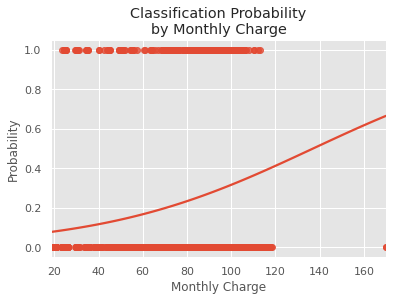

In [ ]:
plt.style.use('ggplot')
sns.regplot(x=x_test[:,8], y=y_pred, data=cleaned_df, logistic=True, ci=None)
plt.xlabel('Monthly Charge')
plt.ylabel('Probability')
plt.title('Classification Probability\nby Monthly Charge')
plt.show()

Semakin kecil biaya bulanan maka customer cenderung No Churn (0)

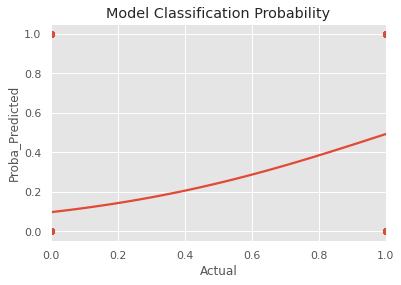

In [ ]:
# Plot Actual Label vs Predicted Label
sns.regplot(x=y_test, y=y_pred, data=cleaned_df, logistic=True, ci=None)
plt.xlabel('Actual')
plt.ylabel('Proba_Predicted')
plt.title('Model Classification Probability')
plt.show()

Dari Grafik terlihat bahwa model cenderung mengklasifikasikan customer sebagai class 0 (No Churn)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Train the model
rf_model = RandomForestClassifier().fit(x_train, y_train)
print(rf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


### Train Set Classification Report

In [ ]:
from sklearn.metrics import classification_report
# Predict
y_pred = rf_model.predict(x_train)
# Print classification report
print('Classification Report Test Model (Logistic Regression) :')
print(classification_report(y_train, y_pred, labels=[0, 1]))

Classification Report Test Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       0.99      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



### Train Set Confusion Matrix

          No Churn  Churn
No Churn      3568      7
Churn           15   1275

TP: 3568 FN:   7
FP:   15 TN: 1275


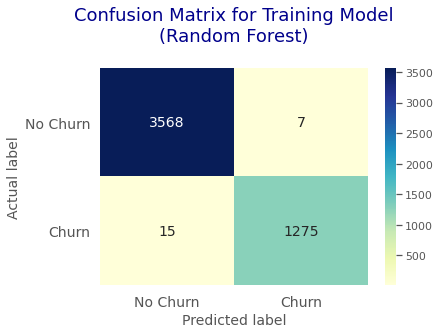

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
cnf_matrix = confusion_matrix(y_train, y_pred, labels=[0, 1])
confusion_matrix_df = pd.DataFrame(cnf_matrix, index=['No Churn', 'Churn'], columns=['No Churn', 'Churn'])
print(confusion_matrix_df)
print('\nTP: {} FN: {:>3}\nFP: {:>4} TN: {}'.format(cnf_matrix[0][0], cnf_matrix[0][1], cnf_matrix[1][0], cnf_matrix[1][1]))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('Actual label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 80%, dengan detil tebakan `churn` yang sebenernya `benar churn` adalah 1275, tebakan `tidak churn` yang sebenernya `tidak churn` adalah 3568, tebakan `tidak churn` yang sebenernya `benar churn` adalah 15 dan tebakan `churn` yang sebenernya `tidak churn` adalah 7.

### Test Set Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = rf_model.predict(x_test)
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_test, y_pred))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1539
           1       0.59      0.47      0.53       546

    accuracy                           0.78      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.76      0.78      0.77      2085



### Test Set Confusion Matrix

          No Churn  Churn
No Churn      1359    180
Churn          287    259

TP: 1359 FN: 180
FP:  287 TN: 259


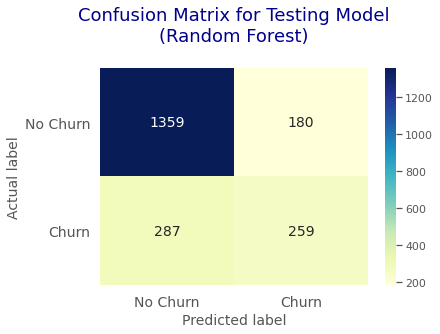

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
confusion_matrix_df = pd.DataFrame(cnf_matrix, index=['No Churn', 'Churn'], columns=['No Churn', 'Churn'])
print(confusion_matrix_df)
print('\nTP: {} FN: {:>3}\nFP: {:>4} TN: {}'.format(cnf_matrix[0][0], cnf_matrix[0][1], cnf_matrix[1][0], cnf_matrix[1][1]))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('Actual label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 78%, dengan detil tebakan `churn` yang sebenernya `benar churn` adalah 259, tebakan `tidak churn` yang sebenernya `tidak churn` adalah 1359, tebakan `tidak churn` yang sebenernya `benar churn` adalah 287 dan tebakan `churn` yang sebenernya `tidak churn` adalah 180.

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#Train the model
gb_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gb_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### Train Set Classification Report

In [ ]:
from sklearn.metrics import classification_report
# Predict
y_pred = gb_model.predict(x_train)
# Print classification report
print('Classification Report Test Model (Logistic Regression) :')
print(classification_report(y_train, y_pred, labels=[0, 1]))

Classification Report Test Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



### Train Set Confusion Matrix

          No Churn  Churn
No Churn      3286    289
Churn          606    684

TP: 3286 FN: 289
FP:  606 TN: 684


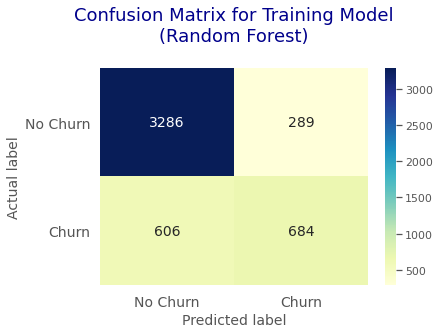

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
cnf_matrix = confusion_matrix(y_train, y_pred, labels=[0, 1])
confusion_matrix_df = pd.DataFrame(cnf_matrix, index=['No Churn', 'Churn'], columns=['No Churn', 'Churn'])
print(confusion_matrix_df)
print('\nTP: {} FN: {:>3}\nFP: {:>4} TN: {}'.format(cnf_matrix[0][0], cnf_matrix[0][1], cnf_matrix[1][0], cnf_matrix[1][1]))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('Actual label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 80%, dengan detil tebakan `churn` yang sebenernya `benar churn` adalah 684, tebakan `tidak churn` yang sebenernya `tidak churn` adalah 3286, tebakan `tidak churn` yang sebenernya `benar churn` adalah 606 dan tebakan `churn` yang sebenernya `tidak churn` adalah 289.

### Test Set Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = gb_model.predict(x_test)
print('Classification Report Training Model (Gradient Boosting) :')
print(classification_report(y_test, y_pred))

Classification Report Training Model (Gradient Boosting) :
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



### Test Set Confusion Matrix

          No Churn  Churn
No Churn      1394    145
Churn          285    261

TP: 1394 FN: 145
FP:  285 TN: 261


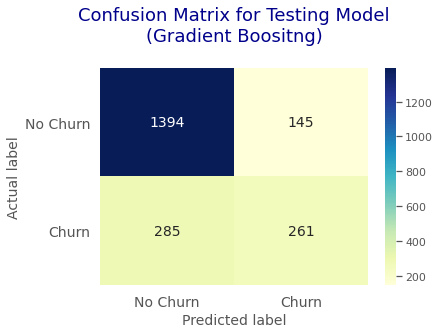

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
confusion_matrix_df = pd.DataFrame(cnf_matrix, index=['No Churn', 'Churn'], columns=['No Churn', 'Churn'])
print(confusion_matrix_df)
print('\nTP: {} FN: {:>3}\nFP: {:>4} TN: {}'.format(cnf_matrix[0][0], cnf_matrix[0][1], cnf_matrix[1][0], cnf_matrix[1][1]))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boositng)\n', fontsize=18, color='darkblue')
plt.ylabel('Actual label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan `churn` yang sebenernya `benar churn` adalah 261, tebakan `tidak churn` yang sebenernya `tidak churn` adalah 1394, tebakan `tidak churn` yang sebenernya `benar churn` adalah 285 dan tebakan `churn` yang sebenernya `tidak churn` adalah 145.

# Menentukan Algoritma Model Terbaik
Model yang baik adalah model yang mampu memberikan performa bagus di fase training dan testing model.

    1. Over-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan sangat baik di fase training,
     akan tetapi tidak mampu memprediksi sama baiknya di fase testing.
    2. Under-Fitting adalah suatu kondisi dimana model kurang mampu memprediksi dengan baik di fase training,
     akan tetapi mampu memprediksi dengan baik di fase testing.
    3. Appropriate-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan baik di fase training
     maupun di fase testing.


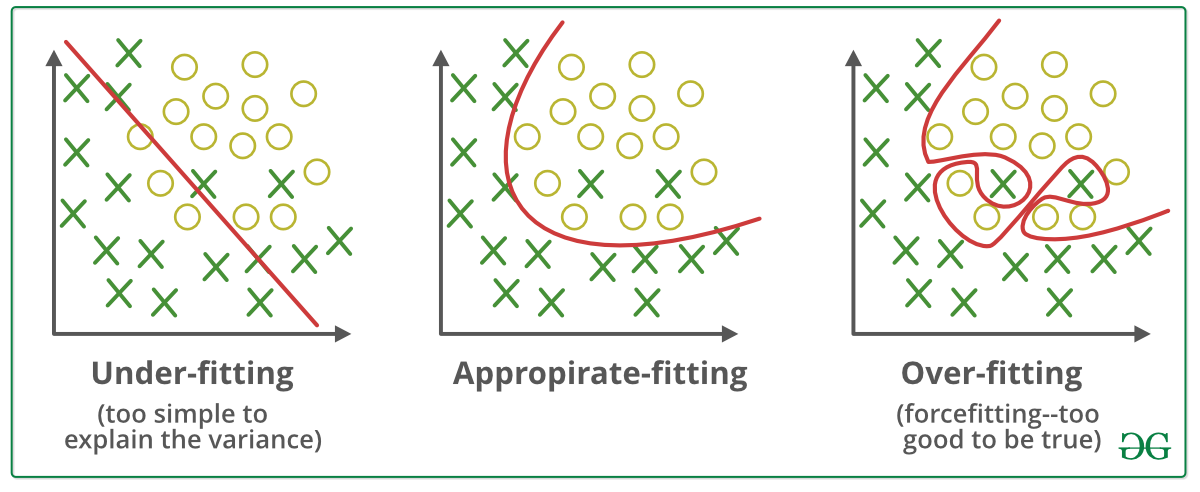

Selanjutnya kita akan menentukan model algoritma terbaik dari model yang sudah di lakukan di atas (Appropriate-Fitting), kemudian kita simpan sebagai file best_model_churn.pkl dengan tujuan untuk deployment model nantinya kita tidak perlu mengulang lagi pemodelan, cukup memanggil file tersebut saja. Simpan di file direktori sesuai dataset berada, kemudian check apakah file tersebut benar tersimpan atau tidak. Gunakan dump() dari pickle untuk menyimpan file.

In [ ]:
#Save Model
pickle.dump(log_model, open('best_model_churn.pkl', 'wb'))

# Kesimpulan
Berdasarkan pemodelan yang telah dilakukan dengan menggunakan Logistic Regression, Random Forest dan Extreme Gradiant Boost, maka dapat disimpulkan untuk memprediksi churn dari pelanggan telco dengan menggunakan dataset ini model `terbaiknya` adalah menggunakan algortima `Logistic Regression`. Hal ini dikarenakan `performa` dari model Logistic Regression cenderung mampu memprediksi `sama baiknya` di `fase training maupun testing` (akurasi training 80%, akurasi testing 79%), dilain sisi `algoritma lainnya cenderung Over-Fitting` performanya. Akan tetapi hal ini tidak menjadikan kita untuk menarik kesimpulan bahwsannya jika untuk melakukan pemodelan apapun maka digunakan Logistic Regression, kita tetap harus melakukan banyak percobaan model untuk menentukan mana yang terbaik.